In [4]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Sklearn classification model evaluation function
from sklearn.metrics import accuracy_score

# Convenience functions.  This can be found on the course github
from functions import *

In [11]:
dataset = pd.read_csv("world_data.csv")
dataset.shape
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [12]:
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)
# Compute the mean for each feature
means = dataset.mean().to_dict()

# Impute each null with the mean of that feature
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

C:\Users\g_boilay\AppData\Local\Temp\ipykernel_37316\1988906198.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = dataset.mean().to_dict()


In [14]:
dataset.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

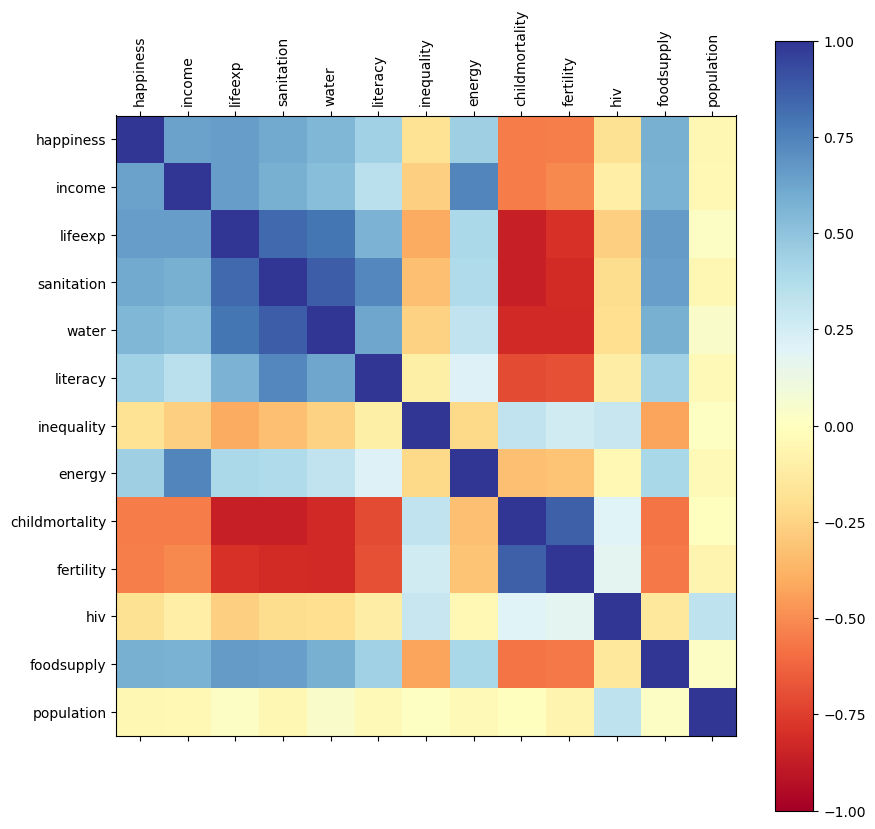

In [16]:
correlationMatrix(dataset)

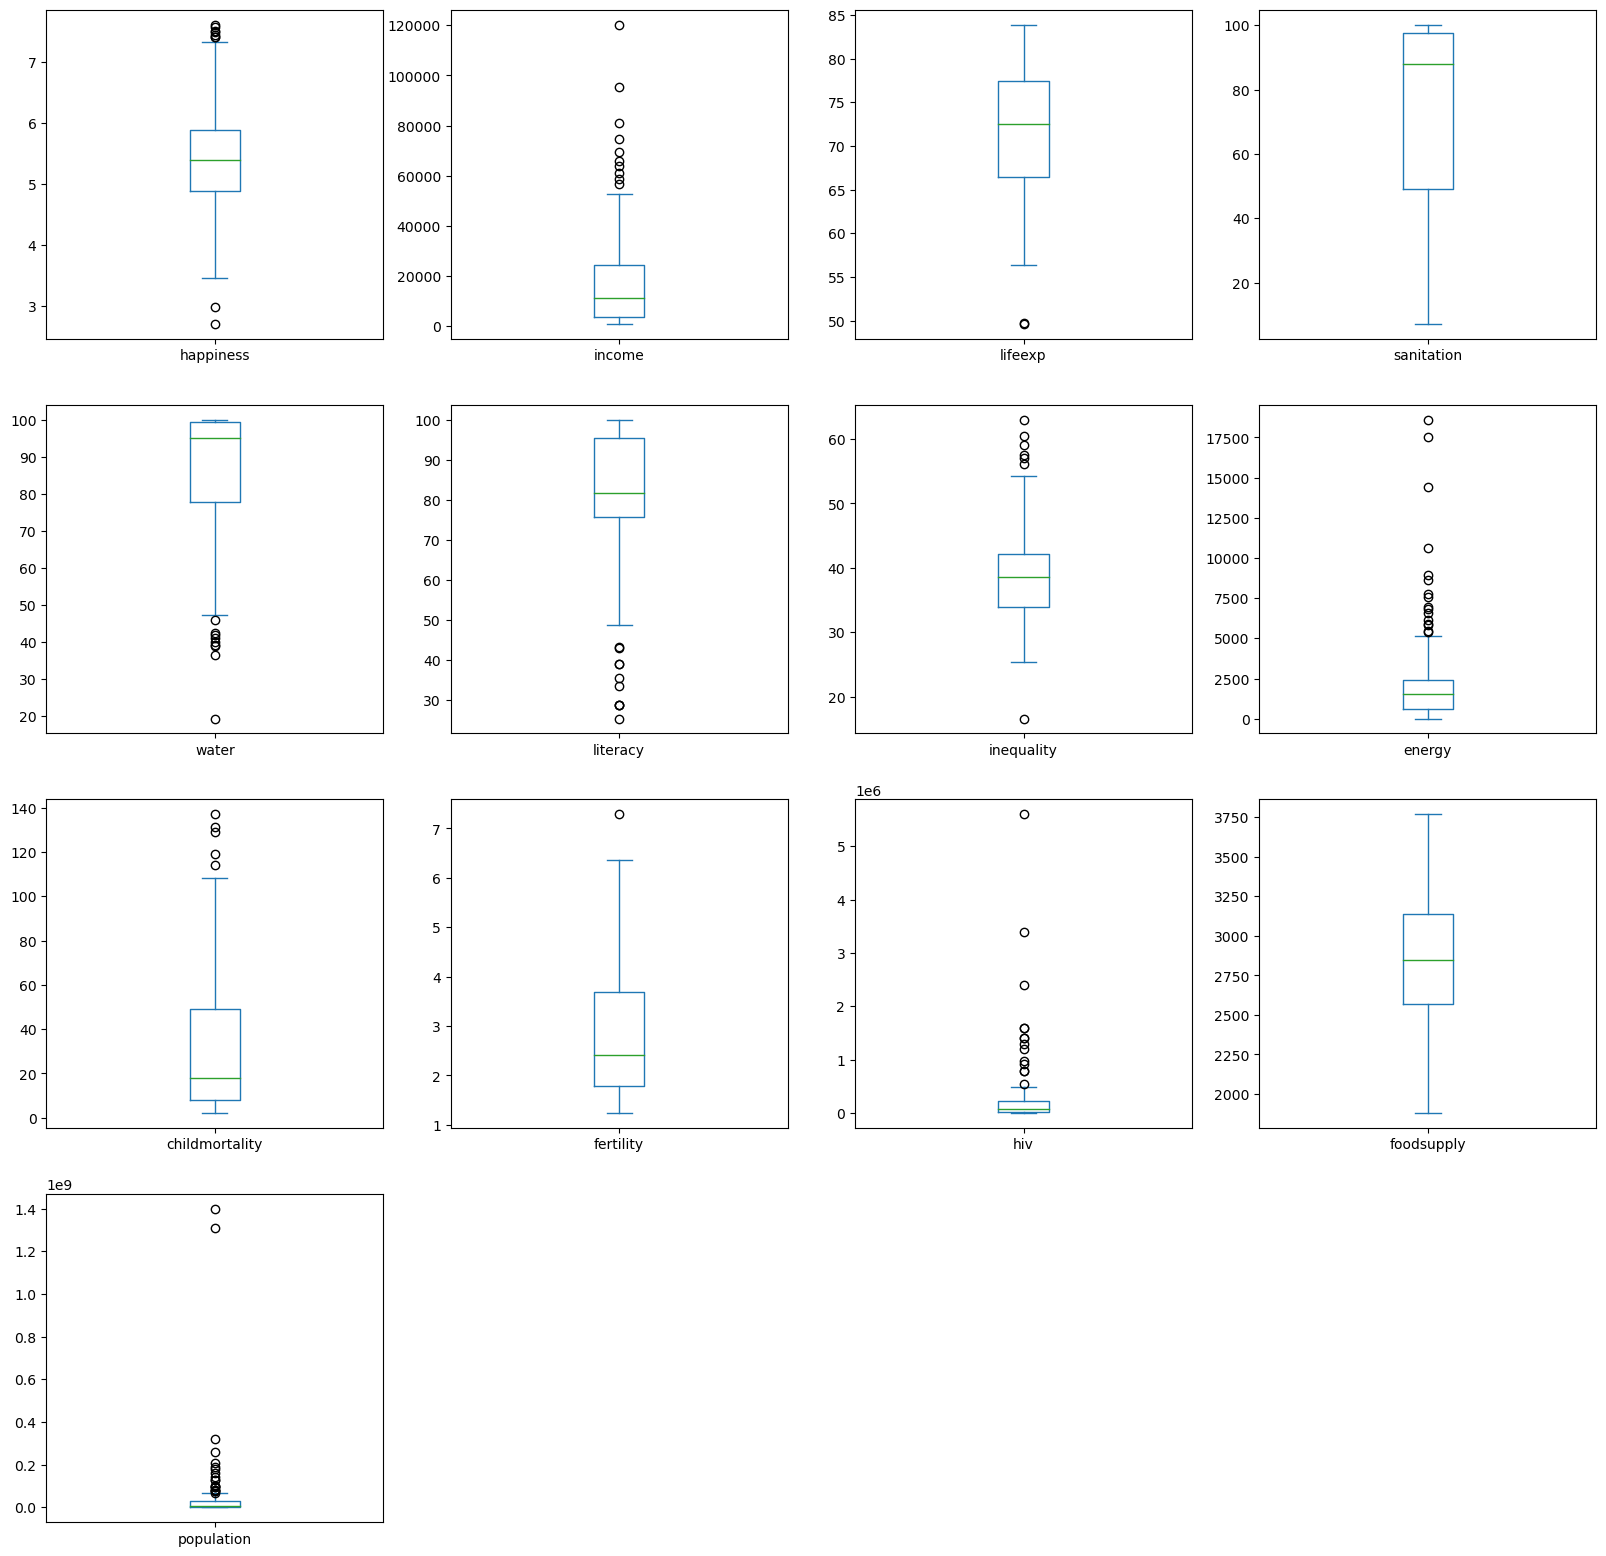

In [18]:
boxPlotAll(dataset)

In [20]:
dataset = appendEqualCountsClass(dataset, "lifeexp_band", "lifeexp", 3, ["L","M","H"])

In [22]:
dataset.lifeexp_band.value_counts()

L    65
H    65
M    64
Name: lifeexp_band, dtype: int64

In [24]:
y = dataset["lifeexp_band"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility', 'hiv', 'foodsupply', 'population']]

In [26]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, columns=X.columns)

In [29]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [33]:
# Build a decision tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [35]:
# Build a logistic regression model
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [37]:
# Check the model performance with the training data
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train, predictions_dt))

DecisionTreeClassifier 1.0


In [39]:
# Check the model performance with the training data
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train, predictions_lr))

LogisticRegression 0.8217054263565892


In [41]:
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))

DecisionTreeClassifier 0.6923076923076923


In [43]:
predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(Y_test, predictions_lr))

LogisticRegression 0.7230769230769231


In [57]:
model = model_lr

from sklearn import tree
import graphviz

viewDecisionTree(model_dt, X.columns)

NameError: name 'column_names' is not defined

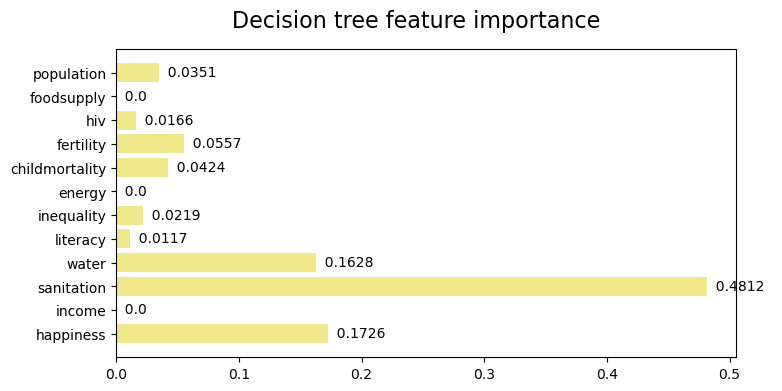

In [51]:
decisionTreeSummary(model_dt, X.columns)

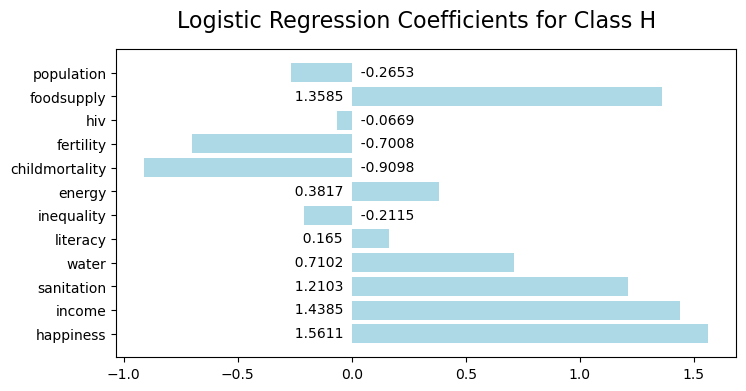

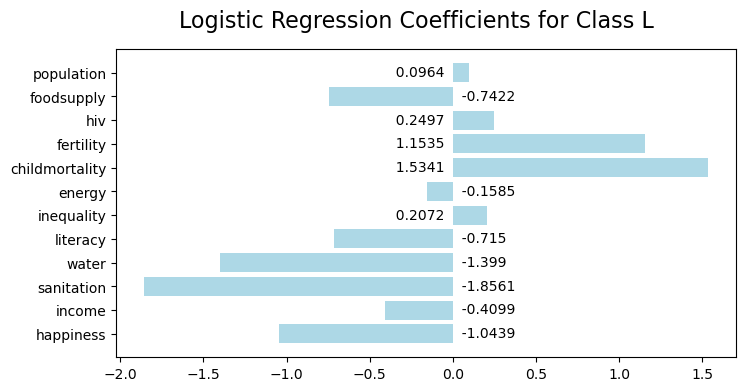

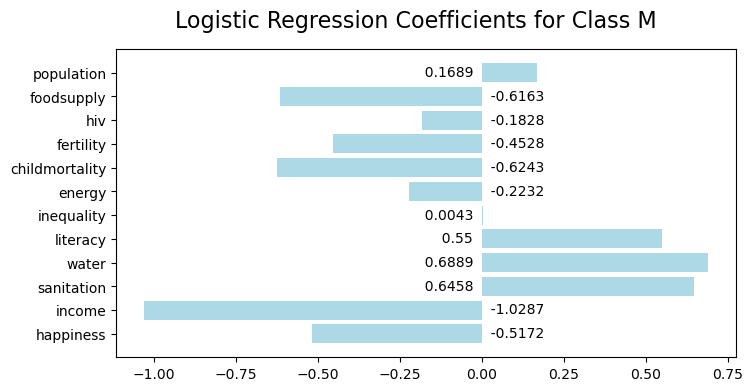

In [52]:
logisticRegressionSummary(model_lr, X.columns)